In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dftest = pd.read_csv("ML2test.csv")

In [3]:
dftrain = pd.read_csv("ML2train.csv")

In [4]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
missing_values = dftrain.isnull().sum()

In [8]:
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data = dftrain.drop(columns=["PassengerId", "Ticket"])

In [10]:
# Handle missing values
dftrain['Age'].fillna(data['Age'].median(), inplace=True)  # Fill 'Age' with the median
dftrain['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Fill 'Embarked' with the mode
data = data.drop(columns=["Cabin"])  # Drop 'Cabin' due to many missing values

C:\Users\Purva\AppData\Local\Temp\ipykernel_19188\4263193275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftrain['Age'].fillna(data['Age'].median(), inplace=True)  # Fill 'Age' with the median
C:\Users\Purva\AppData\Local\Temp\ipykernel_19188\4263193275.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [11]:
# Check data after cleaning
print("\nData After Handling Missing Values:")
print(dftrain.info())


Data After Handling Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [12]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print("\nDataset Dimensions:")
print(f"Training Set: {train_data.shape}, Testing Set: {test_data.shape}")


Dataset Dimensions:
Training Set: (712, 9), Testing Set: (179, 9)


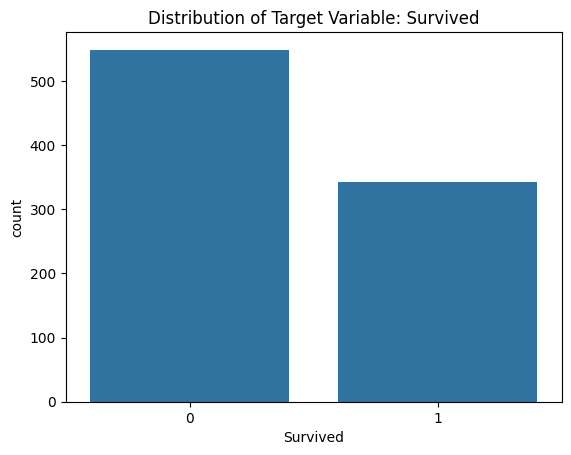

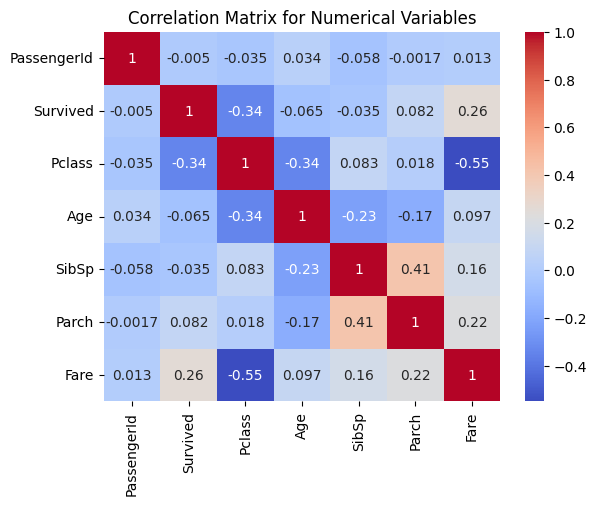

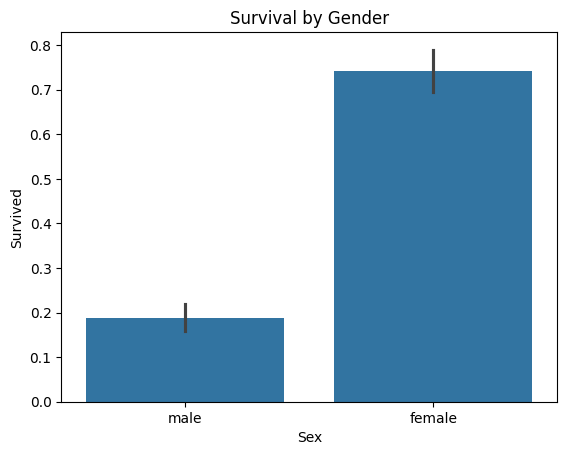

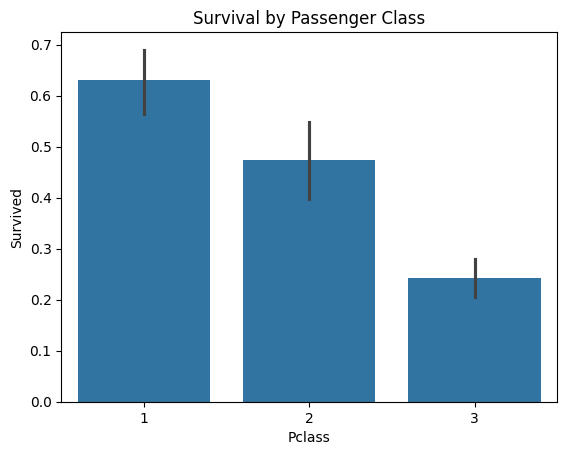

In [13]:
#Methodology:
    #Analyze relationships between variables using visualizations.
    #Identify influential features for predicting survival.
    #Use correlation matrices and bar plots for insights.

# Visualize target distribution
sns.countplot(data=data, x="Survived")
plt.title("Distribution of Target Variable: Survived")
plt.show()

# Select only numerical columns for correlation matrix
numerical_data = dftrain.select_dtypes(include=["number"])

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

# Analyze survival by gender
sns.barplot(data=data, x="Sex", y="Survived")
plt.title("Survival by Gender")
plt.show()

# Analyze survival by passenger class
sns.barplot(data=data, x="Pclass", y="Survived")
plt.title("Survival by Passenger Class")
plt.show()

In [16]:
print(X_train.dtypes)
print(X_train.head())


PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
     PassengerId  Pclass     Sex   Age  SibSp  Parch             Ticket  \
331          332       1    male  45.5      0      0             113043   
733          734       2    male  23.0      0      0              28425   
382          383       3    male  32.0      0      0  STON/O 2. 3101293   
704          705       3    male  26.0      1      0             350025   
813          814       3  female   6.0      4      2             347082   

        Fare Cabin Embarked  
331  28.5000  C124        S  
733  13.0000   NaN        S  
382   7.9250   NaN        S  
704   7.8542   NaN        S  
813  31.2750   NaN        S  


In [17]:
dftrain["Pclass"] = dftrain["Pclass"].astype(str)

In [18]:
categorical_features = ["Sex", "Embarked", "Pclass", "Cabin"]  # Include all categorical columns


In [19]:
dftrain["Cabin"] = dftrain["Cabin"].fillna("Unknown")  # Fill missing values
dftrain["Cabin"] = dftrain["Cabin"].str[0]  # Extract only the first letter (e.g., "C" from "C124")


In [21]:
X = dftrain.drop(columns=["Survived", "Name", "Ticket", "Cabin"])  


In [22]:
dftrain["Pclass"] = dftrain["Pclass"].astype(str)  # Convert to string for encoding


In [23]:
categorical_features = ["Sex", "Embarked", "Pclass"]  # Ensure all necessary categorical columns are included


In [24]:
dftrain["Age"].fillna(dftrain["Age"].median(), inplace=True)
dftrain["Fare"].fillna(dftrain["Fare"].median(), inplace=True)
dftrain["Embarked"].fillna(dftrain["Embarked"].mode()[0], inplace=True)


C:\Users\Purva\AppData\Local\Temp\ipykernel_19188\877351837.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftrain["Age"].fillna(dftrain["Age"].median(), inplace=True)
C:\Users\Purva\AppData\Local\Temp\ipykernel_19188\877351837.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

C:\Users\Purva\AppData\Local\Temp\ipykernel_19188\620878068.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftrain["Age"].fillna(dftrain["Age"].median(), inplace=True)
C:\Users\Purva\AppData\Local\Temp\ipykernel_19188\620878068.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



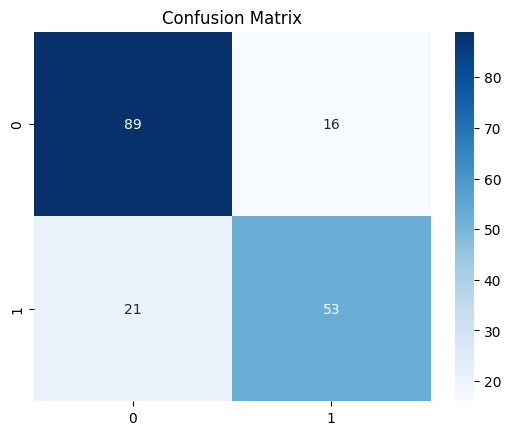

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Drop unnecessary columns
dftrain = dftrain.drop(columns=["Name", "Ticket", "Cabin"])  

# Handle missing values
dftrain["Age"].fillna(dftrain["Age"].median(), inplace=True)
dftrain["Fare"].fillna(dftrain["Fare"].median(), inplace=True)
dftrain["Embarked"].fillna(dftrain["Embarked"].mode()[0], inplace=True)

# Convert 'Pclass' to a string for proper encoding
dftrain["Pclass"] = dftrain["Pclass"].astype(str)

# Split data into features and target
X = dftrain.drop(columns=["Survived"])  
y = dftrain["Survived"]

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical features
categorical_features = ["Sex", "Embarked", "Pclass"]  

# Preprocessor to handle categorical encoding
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)],
    remainder="passthrough"
)

# Build the logistic regression pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=500))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
